#### Load data from large analysis and get summaries to plot 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import load

In [2]:
# plot results from Simulation scripts/SBR_simulation.py
loaded_data = load('/u/ruizsuar/InformedML-CV/Environments/SBR_Nov25.pkl')# 21
globals().update(loaded_data)

In [3]:
# get quantiles 
quantiles = [0.2, 0.5, 0.8]  
quantile_array_acc = np.quantile(accuracy_test, q=quantiles, axis=3)
mean_array_acc = np.mean(accuracy_test, axis=3)
sd_array_acc = np.std(accuracy_test, axis=3)
quantile_array_ce = np.quantile(ce_test, q=quantiles, axis=3)
mean_array_ce = np.mean(ce_test, axis=3)


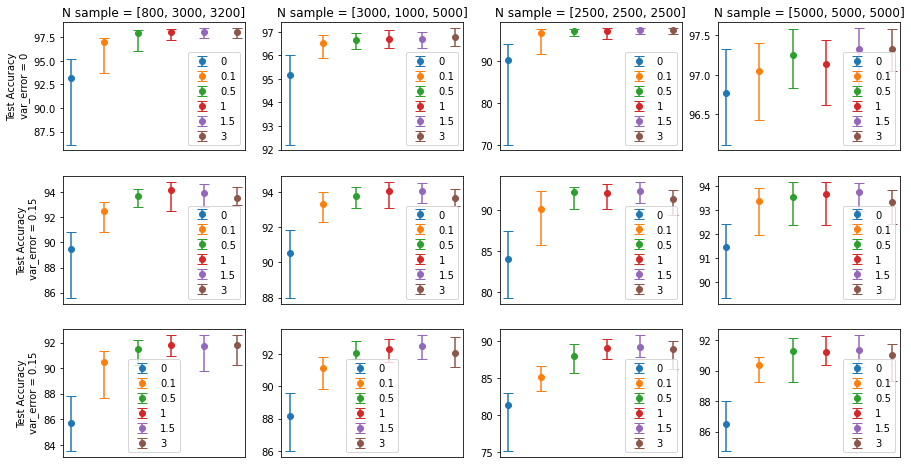

In [4]:
# Plot accuracy
fig, axes = plt.subplots(len(var_errors),len(n_samples), figsize=(15, 8))

x_offsets = sequence = np.arange(0, len(alphas)*0.1,0.1)
 # Offsets for each plot on the x-axis

for i in range(len(n_samples)):
    for v in range(len(var_errors)):
        for j in range(len(alphas)):
            
            median = quantile_array_acc[1,v,j,i]
            lower_error = median - quantile_array_acc[0,v,j,i] 
            upper_error = quantile_array_acc[2,v,j,i] - median
            errors = [[lower_error], [upper_error]]  
            axes[v,i].errorbar(x=x_offsets[j],  
                        y=[median],
                        yerr=errors,
                        fmt='o',  
                        capsize=5,
                    )

            axes[v,i].legend(alphas)
            if v == 0:
                axes[v,i].set_title(f'N sample = {n_samples[i]}')
            if i% 4 ==0:
                axes[v,i].set(ylabel = f'Test Accuracy\n var_error = {var_errors[v]}')
            axes[v,i].set_xticks([])  


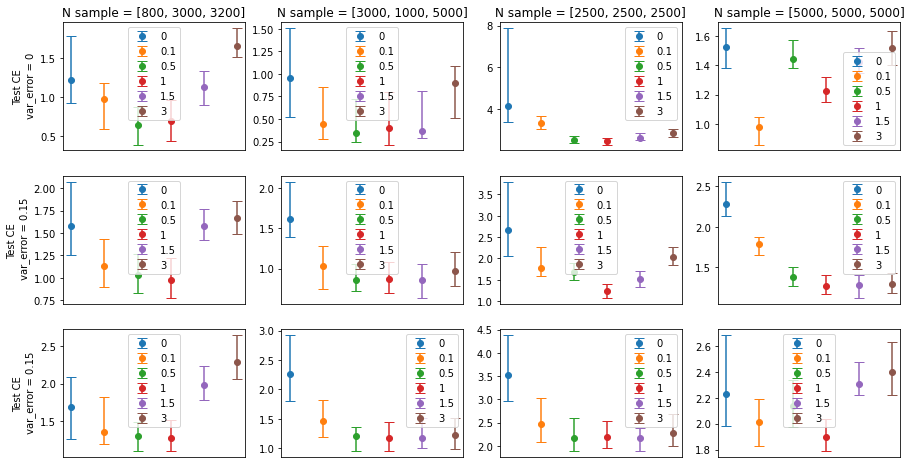

In [ ]:
# Plot Cross-Entropy
fig, axes = plt.subplots(len(var_errors),len(n_samples), figsize=(15, 8))

x_offsets = sequence = np.arange(0, len(alphas)*0.1,0.1)
# Offsets for each plot on the x-axis

for i in range(len(n_samples)):
    for v in range(len(var_errors)):
        for j in range(len(alphas)):
            # Combine the lower and upper errors in a single array
            median = quantile_array_ce[1,v,j,i]
            mean = mean_array_ce[v,j,i]
            lower_error = median - quantile_array_ce[0,v,j,i] 
            upper_error = quantile_array_ce[2,v,j,i] - median

            errors = [[lower_error], [upper_error]]  


            axes[v,i].errorbar(x=x_offsets[j],  
                        y=[mean],
                        yerr=errors,
                        fmt='o',  
                        capsize=5,
                    )
            axes[v,i].legend(alphas)
            if v == 0:
                axes[v,i].set_title(f'N sample = {n_samples[i]}')
            if i% 4 ==0:
                axes[v,i].set(ylabel = f'Test CE\n var_error = {var_errors[v]}')
            axes[v,i].set_xticks([])  
